In [43]:
import torch
import matplotlib.pyplot as plt
plt.style.use('default')

In [44]:
def get_file(avg, a, temperature, n_client, n_train_data, n_public_data, n_test_data, seed, local_epochs, distill_epochs, server_epochs, batch_size, alpha, dataset, model_structure):
    if avg:
        save_path = f'./res/fedavg_seed_{seed}_alpha_{alpha}_dataset_{dataset}_model_structure_{model_structure}/'
        file_name = save_path + \
            f'n_client_{n_client}_' + \
            f'n_train_data_{n_train_data}_' + \
            f'n_test_data_{n_test_data}_' + \
            f'local_epochs_{local_epochs}_' + \
            f'server_epochs_{server_epochs}_' + \
            f'batch_size_{batch_size}_' + \
            f'dataset_{dataset}.pt'
    else:
        save_path = f'./res/fedmd_seed{seed}_alpha_{alpha}_dataset_{dataset}_model_structure_{model_structure}/'
        file_name = save_path + \
            f'a_{a}_' + \
            f'temperature_{temperature}_' + \
            f'n_client_{n_client}_' + \
            f'n_train_data_{n_train_data}_' + \
            f'n_public_data_{n_public_data}_' + \
            f'n_test_data_{n_test_data}_' + \
            f'local_epochs_{local_epochs}_' + \
            f'distill_epochs_{distill_epochs}_' + \
            f'batch_size_{batch_size}_' + \
            f'dataset_{dataset}.pt'
    return file_name

In [45]:
# file_name = 'res/hyper_fed_seed_10000_alpha_1.0_dataset_cifar10_model_structure_cnn3/a_1.0_T_15_local_epochs_10_server_epochs_20_distill_epochs_10_batch_size_160.pt'
# file_name = './res/hyper_fed1_seed_10000_alpha_1.0_dataset_cifar10_model_structure_cnn3/a_0.5_T_10_local_epochs_10_server_epochs_20_distill_epochs_10_batch_size_160.pt'
# file_name = './res/fedavg_pub_seed_10000_alpha_1.0_dataset_cifar10_model_structure_cnn3/local_epochs_10_server_epochs_20_batch_size_160.pt'
file_name = './res/fedavg1_seed_10000_alpha_1.0_dataset_cifar10_model_structure_cnn3/local_epochs_10_server_epochs_20_batch_size_160.pt'
# file_name = './res/normal_seed_10000_alpha_1.0_dataset_cifar10_model_structure_cnn3/local_epochs_100_batch_size_160.pt'

In [46]:
a = 1.0
temperature = 10.0
n_client = 9
n_train_data = 1000
n_public_data = 100
n_test_data = 200
seed = 0
local_epochs = 5
distill_epochs = 5
server_epochs = 20
batch_size = 160
alpha = 0.1
dataset = 'cifar10'
model_structure = 'resnet18'

avg = False
# file_name = get_file(avg, a, temperature, n_client, n_train_data, n_public_data, n_test_data, seed, local_epochs, distill_epochs, server_epochs, batch_size, alpha, dataset, model_structure)
data_load = torch.load(file_name, map_location='cpu')
key = list(data_load.keys())
print(key)

['acc', 'acc_server']


0.6857026815414429
0.6929931044578552
0.6889428496360779
0.719206690788269
0.7137265205383301
0.7218163013458252
0.6474722623825073
0.6407136917114258
0.6328737139701843


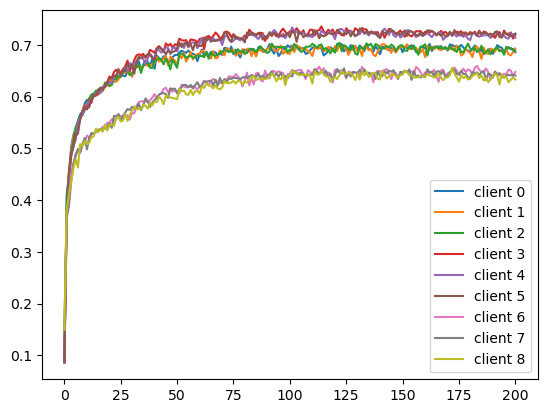

In [47]:
# FedAvg
if 'acc' in key:
    for i, acc in data_load['acc'].items():
        print(acc[-1])
        plt.plot(acc, label=f'client {i}')
    # acc = data_load['acc_server']
    # print(acc[-1])
    # plt.plot(acc, label='FedAvg')
    plt.legend()
    plt.show()

0.7023085951805115
0.7319937348365784
0.6509867310523987


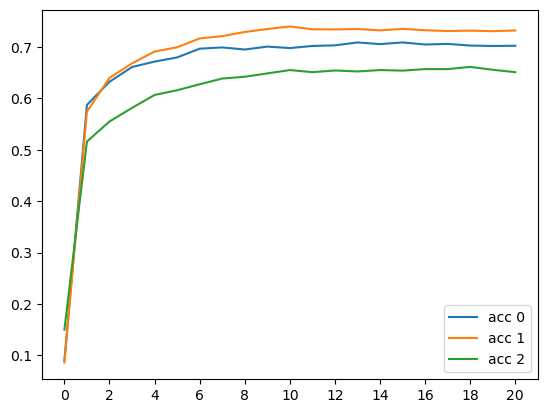

In [48]:
if 'acc_server' in key:
    acc__ = []
    for i, acc in data_load['acc_server'].items():
        # for j, acc_ in acc.items():
        plt.plot(acc, label=f'acc {i}')
        print(acc[-1])
    plt.xticks(ticks=range(0, len(acc), len(acc) // 10))
    plt.legend()
    plt.show()